# Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
PlayerInf = pd.read_csv("../data/player_info.csv")
#Games_plays = pd.read_csv("../data/game_plays.csv")

#Game_goalie_stats = pd.read_csv("../data/game_plays_players.csv")
Game_skater_stats = pd.read_csv("../data/game_skater_stats.csv")
Game = pd.read_csv("../data/game.csv")

### Players Statistics (detailed)

In [3]:
Player_stat_detailed = pd.merge(Game_skater_stats, Game, on='game_id')

In [4]:
Player_stat_detailed.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season',
       'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

In [5]:
Player_stat_detailed = Player_stat_detailed.drop(['game_id', 'team_id', 'type', 'date_time', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz' ], axis=1)

In [6]:
Player_stat_detailed['count'] = 1

In [7]:
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'season', 'count'],
      dtype='object')

In [8]:
grouped = Player_stat_detailed.groupby('player_id', as_index = False)

In [9]:
Player_stat_detailed = grouped.agg({'timeOnIce' : 'mean',
                                     'assists' : 'mean',
                                     'goals' : 'mean',
                                     'shots' : 'mean',
                                     'hits' : 'mean',
                                     'powerPlayGoals' : 'mean',
                                     'powerPlayAssists' : 'mean',
                                     'penaltyMinutes' : 'mean',
                                     'faceOffWins' : 'mean',
                                     'faceoffTaken' : 'mean',
                                     'takeaways' : 'mean',
                                     'giveaways' : 'mean',
                                     'shortHandedGoals' : 'mean',
                                     'shortHandedAssists' : 'mean',
                                     'blocked' : 'mean',
                                     'plusMinus' : 'sum',
                                     'evenTimeOnIce' : 'mean',
                                     'shortHandedTimeOnIce' : 'mean',
                                     'powerPlayTimeOnIce' : 'mean',
                                     'count' : 'sum'}, group_keys = True)

In [10]:
Player_stat_detailed = pd.merge(Player_stat_detailed, PlayerInf, on='player_id')
Player_stat_detailed.columns

Index(['player_id', 'timeOnIce', 'assists', 'goals', 'shots', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes', 'faceOffWins',
       'faceoffTaken', 'takeaways', 'giveaways', 'shortHandedGoals',
       'shortHandedAssists', 'blocked', 'plusMinus', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'count', 'firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link'],
      dtype='object')

/Users/kirillbykov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


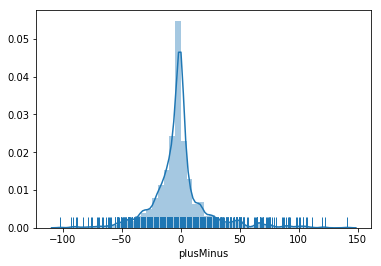

In [11]:
import seaborn as sns
%matplotlib inline

sns.distplot(Player_stat_detailed['plusMinus'], rug=True)

In [12]:
Player_stat_detailed[['goals','firstName',
       'lastName', 'nationality', 'birthCity', 'primaryPosition', 'birthDate',
       'link']].sort_values(by=['goals'])

,goals,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
790,0.000000,Joonas,Nattinen,FIN,Jamsa,C,1991-01-03,/api/v1/people/8475198
935,0.000000,Julian,Melchiori,CAN,Richmond Hill,D,1991-12-06,/api/v1/people/8475815
928,0.000000,Jarred,Tinordi,USA,Burnsville,D,1992-02-20,/api/v1/people/8475797
917,0.000000,Morgan,Ellis,CAN,Summerside,D,1992-04-30,/api/v1/people/8475782
914,0.000000,Petter,Granberg,SWE,Gallivare,D,1992-08-27,/api/v1/people/8475774
899,0.000000,Brett,Bulmer,CAN,Prince George,RW,1992-04-26,/api/v1/people/8475757
898,0.000000,John,McFarland,CAN,Richmond Hill,LW,1992-04-02,/api/v1/people/8475756
884,0.000000,Curtis,Hamilton,USA,Tacoma,LW,1991-12-04,/api/v1/people/8475734
882,0.000000,Danny,Biega,CAN,Montreal,D,1991-09-29,/api/v1/people/8475732
880,0.000000,Mark,Alt,USA,Kansas City,D,1991-10-18,/api/v1/people/8475729


## Players Goals

In [13]:
Games_plays = pd.read_csv("../data/game_plays.csv")
Game_plays_players = pd.read_csv("../data/game_plays_players.csv")


Goals = pd.merge(Games_plays[(Games_plays['event'] == "Goal")],Game_plays_players[Game_plays_players['playerType'] == "Scorer"][['play_id','player_id']],on = 'play_id')

In [14]:
total_goals = pd.DataFrame(Goals.groupby(['player_id']).size())

In [15]:
Goals = pd.merge(Goals, PlayerInf[['player_id', 'firstName', 'lastName', 'primaryPosition', 'birthDate']], on = 'player_id')

In [16]:
Goals = pd.merge(Goals, Game[['season', 'game_id']], on = 'game_id')

In [17]:
total_goals =  pd.merge(total_goals, PlayerInf[['player_id', 'firstName', 'lastName', 'primaryPosition', 'birthDate']], on = 'player_id')
total_goals.sort_values(by=[0], ascending=False)

,player_id,0,firstName,lastName,primaryPosition,birthDate
292,8471214,301,Alex,Ovechkin,LW,1985-09-17
354,8471675,232,Sidney,Crosby,C,1987-08-07
525,8474141,231,Patrick,Kane,RW,1988-11-19
277,8470794,222,Joe,Pavelski,C,1984-07-11
769,8475765,211,Vladimir,Tarasenko,RW,1991-12-13
649,8475166,204,John,Tavares,C,1990-09-20
785,8475794,198,Tyler,Seguin,C,1992-01-31
480,8473994,194,Jamie,Benn,LW,1989-07-18
293,8471215,194,Evgeni,Malkin,C,1986-07-31
250,8470621,193,Corey,Perry,RW,1985-05-16


In [18]:
top_goaliers = total_goals.sort_values(by=[0], ascending=False)[:30]

In [19]:
Goals['distance'] = np.sqrt(np.power(Goals['st_x'] - 100+11,2)+np.power(Goals['st_y'],2))

In [21]:
Goals['periodType'].unique()

array(['REGULAR', 'OVERTIME', 'SHOOTOUT'], dtype=object)

In [39]:
def assist(s):
    s= s[s.find(':')+2:]
    s = s.split()
    if s[0] =='none':
        return("None")
    else:
        return(s[0]+' '+s[1])

def distance_bin(a):
    return("("+str((a//5)*5)+"ft, "+ str((a//5 + 1)*5) +"ft)")


In [40]:
Goals['assist'] = Goals['description'].apply(assist)


In [24]:
Goals['distance_bin'] = Goals['distance'].apply(distance_bin)
Goals['fullName'] = Goals['firstName']+ ' ' +Goals['lastName']

In [25]:
Goals['secondaryType'].unique()

array(['Slap Shot', 'Snap Shot', 'Tip-In', 'Wrist Shot', 'Backhand',
       'Deflected', 'Wrap-around', nan], dtype=object)

In [43]:
for i in range(30):
    player_id  = int(top_goaliers.iloc[[i]]['player_id'])
    Goals[(Goals['player_id'] == player_id) & (Goals['st_x']>0)].to_csv("data/Players/" + str(player_id) + ".csv")
    pd.value_counts(Goals[(Goals['player_id'] == player_id) & (Goals['st_x']>0)]['distance_bin']).to_frame().reset_index().to_csv("data/Bars/" + str(player_id) + ".csv")
    print("<option value="+str(player_id)+">"+str(top_goaliers.iloc[i, 2])+' '+str(top_goaliers.iloc[i, 3])+"</option>")
    

<option value=8471214>Alex Ovechkin</option>
<option value=8471675>Sidney Crosby</option>
<option value=8474141>Patrick Kane</option>
<option value=8470794>Joe Pavelski</option>
<option value=8475765>Vladimir Tarasenko</option>
<option value=8475166>John Tavares</option>
<option value=8475794>Tyler Seguin</option>
<option value=8473994>Jamie Benn</option>
<option value=8471215>Evgeni Malkin</option>
<option value=8470621>Corey Perry</option>
<option value=8473419>Brad Marchand</option>
<option value=8473604>Jonathan Toews</option>
<option value=8474564>Steven Stamkos</option>
<option value=8473548>Phil Kessel</option>
<option value=8474053>Logan Couture</option>
<option value=8474157>Max Pacioretty</option>
<option value=8476453>Nikita Kucherov</option>
<option value=8471707>James Neal</option>
<option value=8470604>Jeff Carter</option>
<option value=8466139>Patrick Marleau</option>
<option value=8470638>Patrice Bergeron</option>
<option value=8470041>Rick Nash</option>
<option value=8

In [42]:
pd.value_counts(Goals['distance_bin']).to_frame().reset_index()

,index,distance_bin
0,"(10.0ft, 20.0ft)",13033
1,"(0.0ft, 10.0ft)",7539
2,"(20.0ft, 30.0ft)",6772
3,"(30.0ft, 40.0ft)",4357
4,"(40.0ft, 50.0ft)",2440
5,"(50.0ft, 60.0ft)",1936
6,"(160.0ft, 170.0ft)",1603
7,"(170.0ft, 180.0ft)",979
8,"(150.0ft, 160.0ft)",730
9,"(60.0ft, 70.0ft)",584


In [27]:
top_goaliers['fullName'] = top_goaliers['firstName']+ ' ' +top_goaliers['lastName']
top_goaliers[['player_id', 'fullName']].to_csv('data/Players/players.csv')

In [28]:
for i in range(30):
    print(str(top_goaliers.iloc[i, 0])+" : "+ "\'" + str(top_goaliers.iloc[i, 6])+"\',")

8471214 : 'Alex Ovechkin',
8471675 : 'Sidney Crosby',
8474141 : 'Patrick Kane',
8470794 : 'Joe Pavelski',
8475765 : 'Vladimir Tarasenko',
8475166 : 'John Tavares',
8475794 : 'Tyler Seguin',
8473994 : 'Jamie Benn',
8471215 : 'Evgeni Malkin',
8470621 : 'Corey Perry',
8473419 : 'Brad Marchand',
8473604 : 'Jonathan Toews',
8474564 : 'Steven Stamkos',
8473548 : 'Phil Kessel',
8474053 : 'Logan Couture',
8474157 : 'Max Pacioretty',
8476453 : 'Nikita Kucherov',
8471707 : 'James Neal',
8470604 : 'Jeff Carter',
8466139 : 'Patrick Marleau',
8470638 : 'Patrice Bergeron',
8470041 : 'Rick Nash',
8471698 : 'T.J. Oshie',
8474190 : 'Wayne Simmonds',
8470610 : 'Zach Parise',
8474037 : 'James van Riemsdyk',
8471218 : 'Blake Wheeler',
8471685 : 'Anze Kopitar',
8475168 : 'Matt Duchene',
8475784 : 'Jeff Skinner',


### Костыли

In [31]:
arr = []
for i in range(30):
    arr.append(top_goaliers.iloc[i, 0])
arr

[8471214,
 8471675,
 8474141,
 8470794,
 8475765,
 8475166,
 8475794,
 8473994,
 8471215,
 8470621,
 8473419,
 8473604,
 8474564,
 8473548,
 8474053,
 8474157,
 8476453,
 8471707,
 8470604,
 8466139,
 8470638,
 8470041,
 8471698,
 8474190,
 8470610,
 8474037,
 8471218,
 8471685,
 8475168,
 8475784]

In [97]:
def GoalLocations(name, lastname):
    x,y = np.array(Goals[(Goals['lastName'] == lastname) & (Goals['firstName'] == name)]['st_x']),\
        np.array(Goals[(Goals['lastName'] == lastname) & (Goals['firstName'] == name)]['st_x'])
    return x,y

In [35]:
Goals[Goals['player_id'].isin(arr)].to_excel("data/General/Goals.xls")

In [105]:
Goals[(Goals['lastName'] == 'Ovechkin') & (Goals['firstName'] == 'Alex')].to_csv('goals.csv')

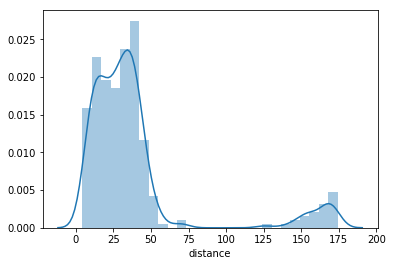

In [111]:
sns.distplot(Goals[(Goals['lastName'] == 'Ovechkin') & (Goals['firstName'] == 'Alex')]['distance'])

(0, 0.07)

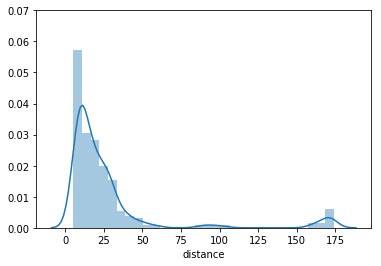

In [57]:
ax = sns.distplot(Goals[(Goals['lastName'] == 'Crosby') & (Goals['firstName'] == 'Sidney')]['distance'])
ax.set_ylim(0,0.07)


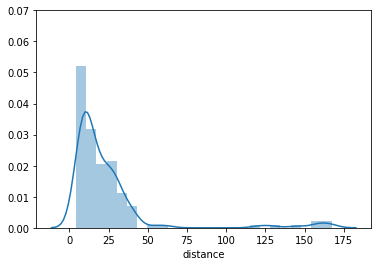

In [58]:
import matplotlib.pyplot as plt


for i in range(30):
    player_id  = int(top_goaliers.iloc[[i]]['player_id'])
    plt.clf()
    ax = sns.distplot(Goals[Goals['player_id'] == player_id]['distance'].fillna(1))
    ax.set_ylim(0,0.07)
    fig = ax.get_figure()
    fig.savefig("data/Bars/" + str(player_id) + ".png", dpi = 500) 

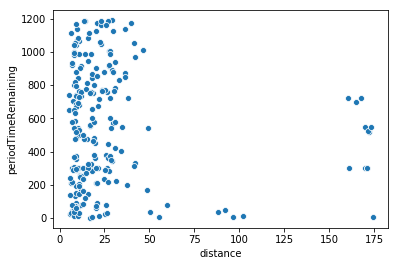

In [38]:
ax = sns.scatterplot(x="distance", y="periodTimeRemaining", data=Goals[(Goals['lastName'] == 'Crosby') & (Goals['firstName'] == 'Sidney')])